### load data from npy (ref : 00_dicom_data_test)

In [60]:
import numpy as np
import dicom
import os

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

output_path = working_path = '01_export_data/'

id = 0
imgs_to_process = np.load(output_path+'fullimages_{}.npy'.format(id))

In [51]:
len(imgs_to_process)

397

In [70]:
imgs_to_process[0]

array([[-2047, -2047, -2047, ..., -2047, -2047, -2047],
       [-2047, -2047, -2047, ..., -2047, -2047, -2047],
       [-2047, -2047, -2047, ..., -2047, -2047, -2047],
       ...,
       [-2047, -2047, -2047, ..., -2047, -2047, -2047],
       [-2047, -2047, -2047, ..., -2047, -2047, -2047],
       [-2047, -2047, -2047, ..., -2047, -2047, -2047]], dtype=int16)

### make CT boundary mask : with canny

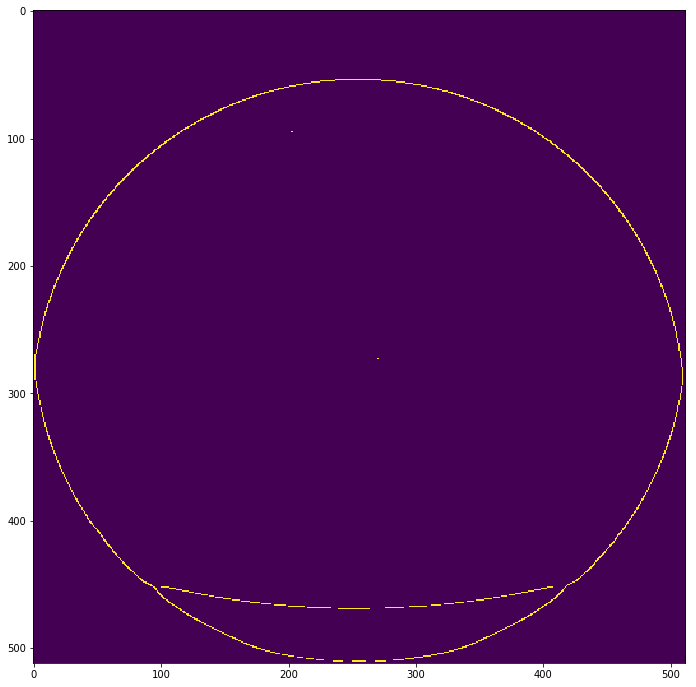

In [52]:
from skimage import feature

img_v1 = imgs_to_process[128]
img_v2 = imgs_to_process[188]
img_v3 = imgs_to_process[248]

edges_v1 = feature.canny(
    image=img_v1,
    sigma=3,
    low_threshold=-1000,
    high_threshold=1000,
)

edges_v2 = feature.canny(
    image=img_v2,
    sigma=3,
    low_threshold=-1000,
    high_threshold=1000,
)

edges_v3 = feature.canny(
    image=img_v3,
    sigma=3,
    low_threshold=-1000,
    high_threshold=1000,
)

CT_boundary_data = edges_v1 & edges_v2 & edges_v3

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(CT_boundary_data)
plt.show()

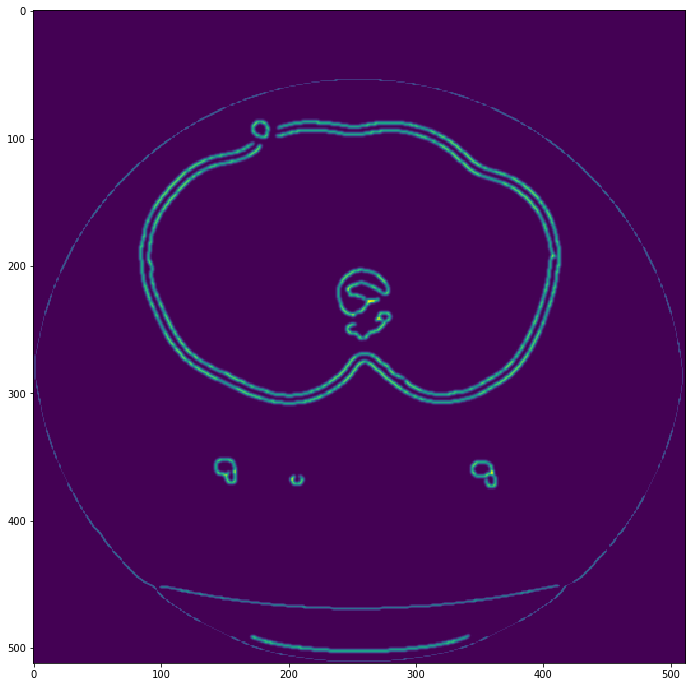

In [77]:
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(edges_v2)
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

test_data = image - dilated

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(test_data)
plt.show()

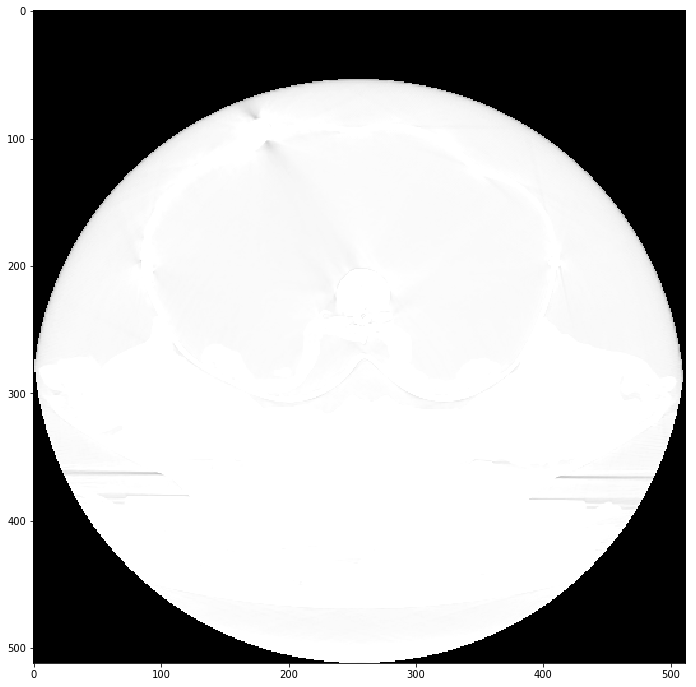

In [82]:
from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(img_v2)
# image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

test_data = image - dilated

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(dilated, cmap='gray')
plt.show()

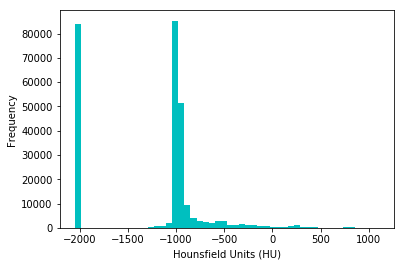

In [85]:
test_hist_a = imgs_to_process[160]

plt.hist(test_hist_a.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

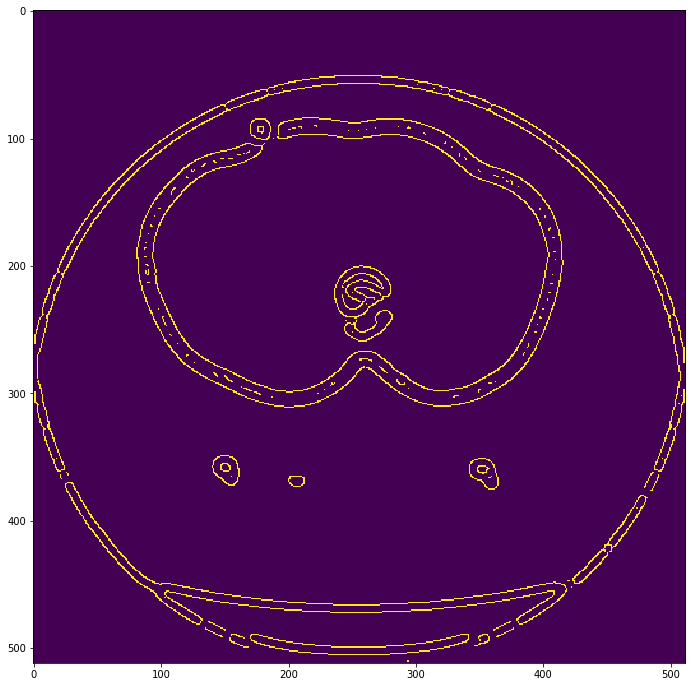

In [55]:
edges = feature.canny(
    image=test_data*50,
    sigma=3,
    low_threshold=0.000,
    high_threshold=0.04,
)

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(edges)
plt.show()

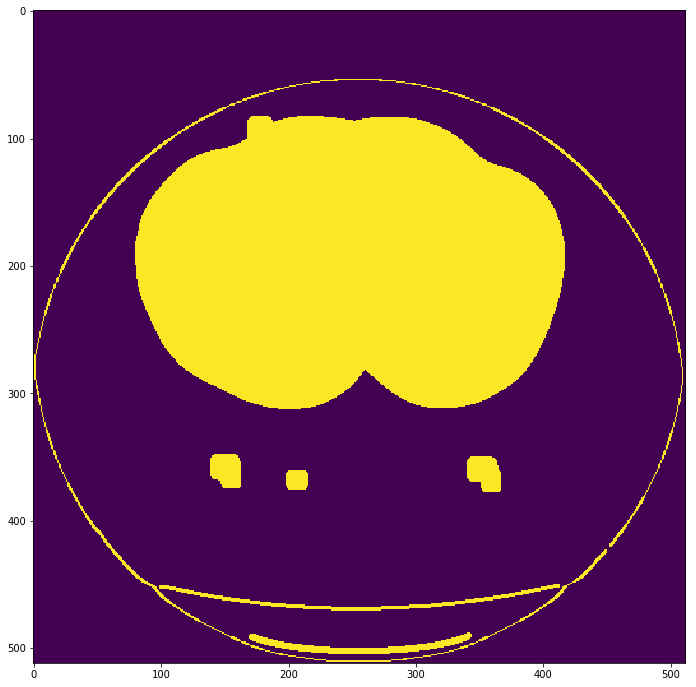

In [56]:
from scipy import ndimage as ndi
fill_abdomen = ndi.binary_fill_holes(test_data)

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(fill_abdomen)
plt.show()

In [75]:
sizes

array([193600,     66,      7,      7,      6,     15,      6,      5,
            5,      4,      4,     11,     11,      4,      4,     39,
           33,      3,      8,      8,      8,      8,      2,      2,
          433,    375,  62698,      2,     51,      2,      2,      8,
            8,      8,      8,      3,      3,     33,     33,      4,
            4,      4,      4,      4,      4,      5,      5,      4,
           22,      5,      4,     20,      7,     14,     29,      6,
           13,      5,      5,      4,      4,      4,      4,      4,
            4,     33,     33,     14,     14,    569,    614,      2,
            2,      8,      8,      2,      2,    256,      2,      2,
            2,      2,      2,      2,      2,      2,    357,      2,
            2,      2,      2,      2,    106,     98,      2,    950,
            2,    102,      2,      2,      2,      2,      2,      2,
            2,      2,      2,      2,      2,      2,      2,      2,
      

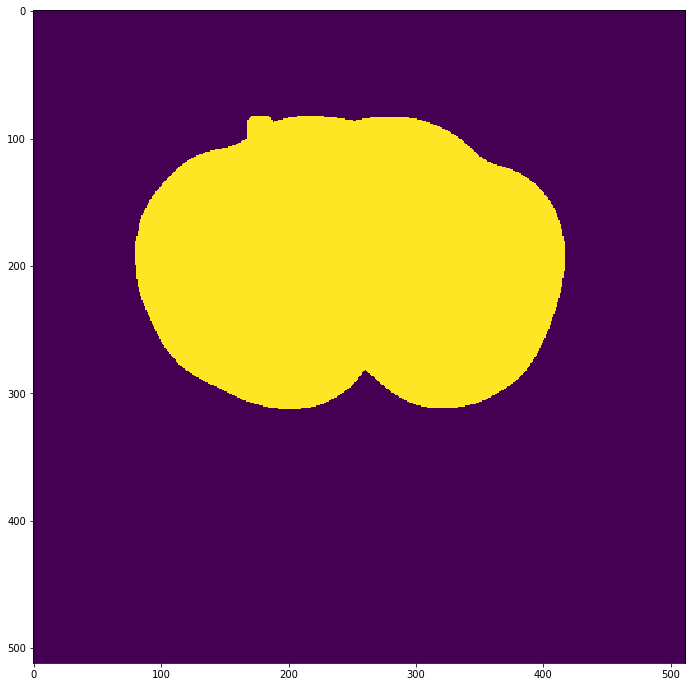

In [57]:
label_objects, nb_labels = ndi.label(fill_abdomen)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 2000
mask_sizes[0] = 0
abdomen_cleaned = mask_sizes[label_objects]

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(abdomen_cleaned)
plt.show()

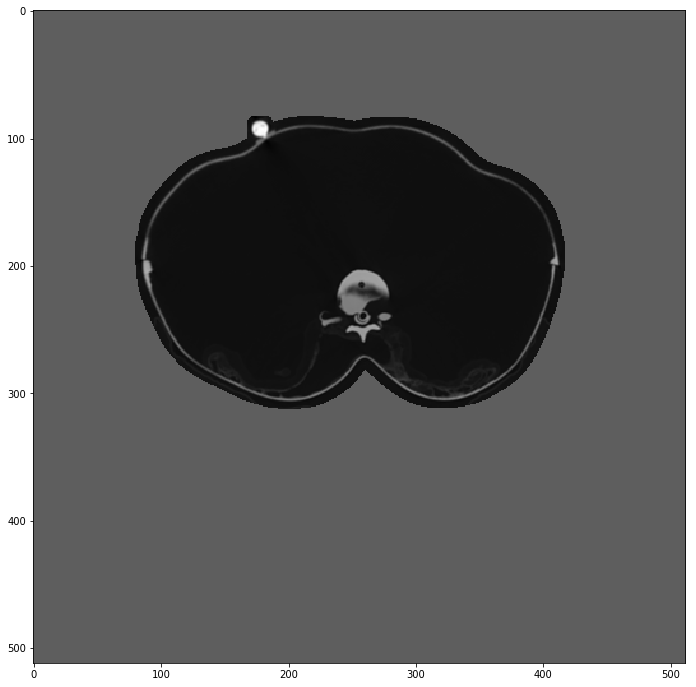

In [67]:
img_masked_v2 = img_v2 * abdomen_cleaned

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(img_masked_v2, cmap='gray')
plt.show()

In [68]:
img_masked_v2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

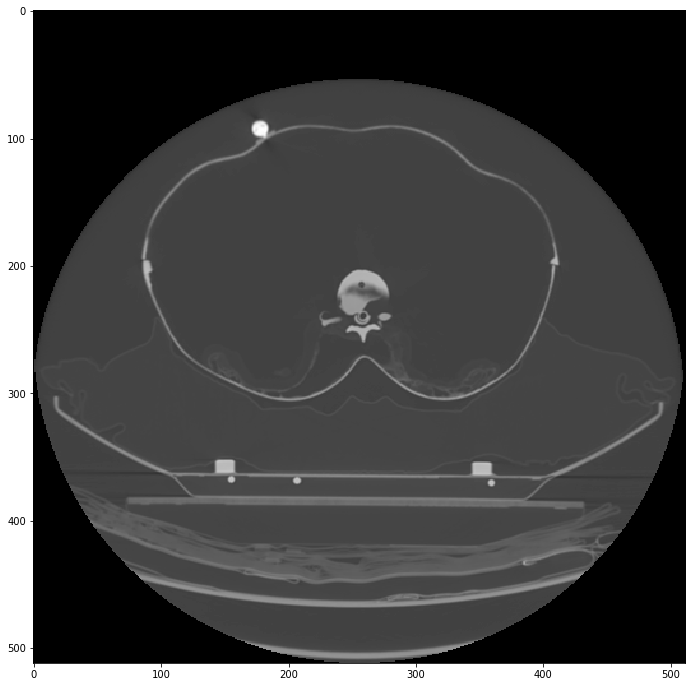

In [66]:
img_v2 = imgs_to_process[188]

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(img_v2, cmap='gray')
plt.show()

### 1 dicom image edge detection test : canny

In [ ]:
from skimage import feature

img = imgs_to_process[188]

edges = feature.canny(
    image=img,
    sigma=3,
    low_threshold=-1000,
    high_threshold=1000,
    
)

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(edges)
plt.show()

### binary fill test

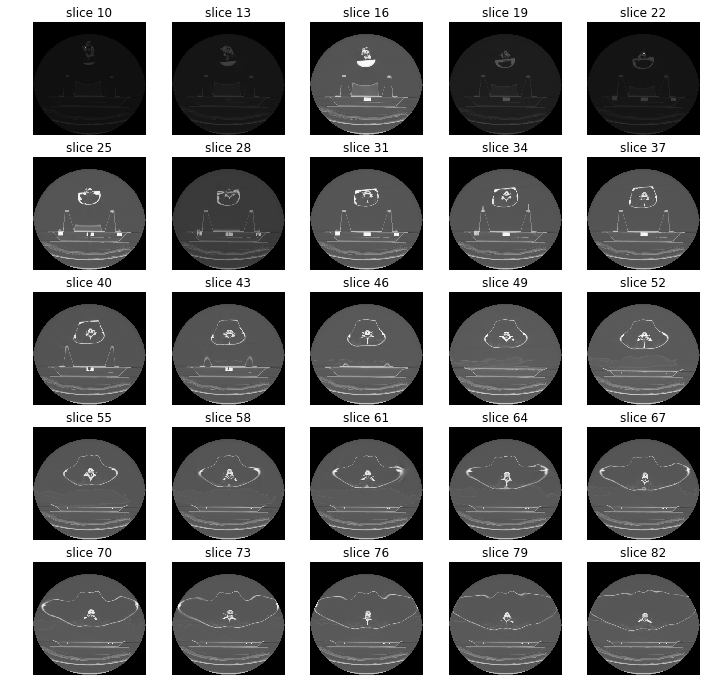

In [65]:
id = 0
imgs_to_process = np.load(output_path+'fullimages_{}.npy'.format(id))

def sample_stack(stack, rows=5, cols=5, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

sample_stack(imgs_to_process)

### test 2

In [87]:
from glob import glob

data_path = 'C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data'
output_path = working_path = '01_export_data/'
g = glob(data_path + '/*.dcm')

# Print out the first 5 file names to verify we're in the right folder.
print("Total of %d DICOM images.\nFirst 5 filenames:" % len(g))
print('\n'.join(g[:5]))

import numpy as np
import dicom
import os

#      
# Loop over the image files and store everything into a list.
# 

def load_scan(path):
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: int(x.InstanceNumber))
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

def get_pixels_hu(scans):
    image = np.stack([s.pixel_array for s in scans])
    # Convert to int16 (from sometimes int16), 
    # should be possible as values should always be low enough (<32k)
    image = image.astype(np.int16)

    # Set outside-of-scan pixels to 1
    # The intercept is usually -1024, so air is approximately 0
    image[image <= -2000] = -1000
    
    # Convert to Hounsfield units (HU)
    intercept = scans[0].RescaleIntercept
    slope = scans[0].RescaleSlope
    
    if slope != 1:
        image = slope * image.astype(np.float64)
        image = image.astype(np.int16)
        
    image += np.int16(intercept)
    
    return np.array(image, dtype=np.int16)

def sample_stack(stack, rows=6, cols=6, start_with=10, show_every=5):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind],cmap='gray')
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

id=11
patient = load_scan(data_path)
imgs = get_pixels_hu(patient)
np.save(output_path + "fullimages_%d.npy" % (id), imgs)

Total of 397 DICOM images.
First 5 filenames:
C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data\CT_003.dcm
C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data\CT_004.dcm
C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data\CT_005.dcm
C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data\CT_006.dcm
C:/Users/dDk13/Desktop/ddk_test/PointCloudTest/data/manekin_data\CT_007.dcm


In [88]:
imgs_dicom_to_process = np.load(output_path+'fullimages_{}.npy'.format(id))

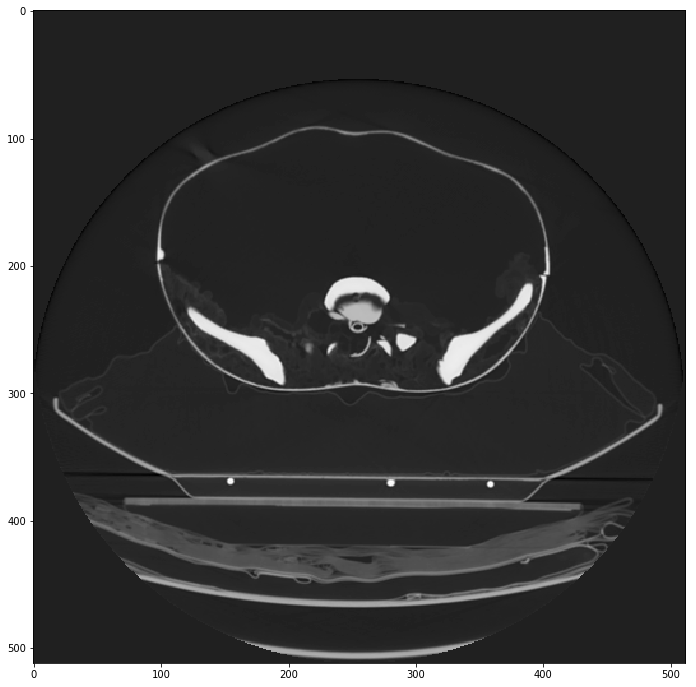

In [89]:
#img_eq = exposure.equalize_hist(img)

#img_test = exposure.equalize_hist(imgs_dicom_to_process[284])
img_test = imgs_dicom_to_process[284]

fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(img_test, cmap='gray')
plt.show()

In [93]:
from skimage import exposure

# Equalization
img_eq = exposure.equalize_adapthist(img_test)

c:\users\ddk13\appdata\local\programs\python\python36\lib\site-packages\skimage\util\dtype.py:131: UserWarning: Possible sign loss when converting negative image of type int16 to positive image of type uint16.
  .format(dtypeobj_in, dtypeobj_out))
c:\users\ddk13\appdata\local\programs\python\python36\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from int16 to uint16
  .format(dtypeobj_in, dtypeobj_out))


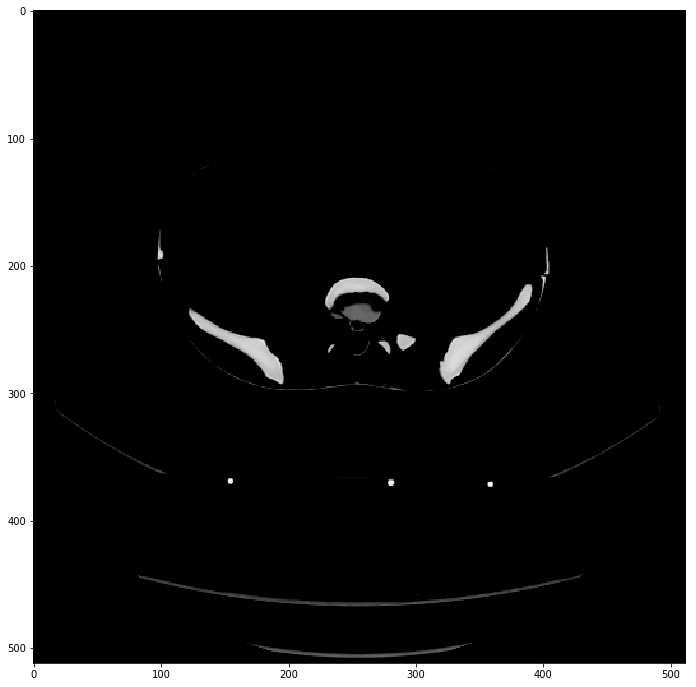

In [94]:
fig,ax = plt.subplots(1,1,figsize=[12,12])
ax.imshow(img_eq, cmap='gray')
plt.show()